<a href="https://colab.research.google.com/github/hy0won/-/blob/master/Titanic_Eda_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# [1] 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# [2] 데이터셋 불러오기 (seaborn 내장 데이터)
titanic = sns.load_dataset('titanic')

In [3]:
# [3] 데이터 구조 확인
titanic.head()          # 상위 5개 행 보기
titanic.info()          # 데이터 요약 정보
titanic.describe()      # 수치형 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# [4] 결측치 확인
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
# [5] 주요 컬럼만 선택해서 보기 (예 : 생존 여부, 성별, 나이)
titanic[['survived', 'sex', 'age']].head()

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [6]:
# [6] 성별에 따른 생존률 분석
gender_survival = titanic.groupby('sex')['survived'].mean()
print("성별 생존률:\n", gender_survival)

성별 생존률:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [8]:
# [7] 나이대별 생존률 보기 (나이 구간화)
titanic['age_group'] = pd.cut(titanic['age'], bins = [0,10,20,30,40,50,80],
                                labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])
age_survival = titanic.groupby('age_group')['survived'].mean()
print("\n나이대별 생존률:\n", age_survival)


나이대별 생존률:
 age_group
0-10     0.593750
11-20    0.382609
21-30    0.365217
31-40    0.445161
41-50    0.383721
51+      0.343750
Name: survived, dtype: float64


<ipython-input-8-e2baf6a266c7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].mean()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

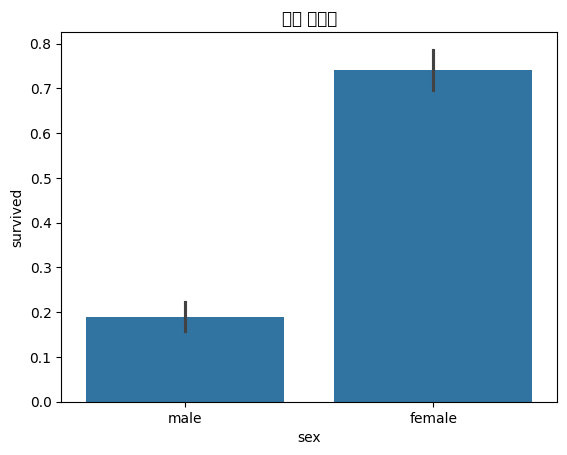

In [9]:
# [8] 시각화 예시
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('성별 생존률')
plt.show()